# Projet de masse de données et fouille de données

## Etape III : Fouille de données

Ce script fait suite directement au script de nettoyage des données (Etape II).

Il est nécessaire de lire les scripts précédents, pour comprendre ce qui est réalisé ici.

Dans ce script, nous appliquons des méthodes de fouilles de données, afin de concevoir des modèles de prédictions des données du Covid-19 aux Etats-Unis.

### Import des librairies

On commence par importer les librairies.

In [1]:
import pandas
import numpy
import matplotlib.pyplot
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from sklearn import preprocessing
import time
import datetime
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

### Import des données

Puis, on importe les données de notre jeu de données <b>nettoyé</b>, et on les "wrap" dans un DataFrame de Pandas.

In [2]:
data = pandas.read_csv("../data/cleaned_data.csv")
dataFrame = pandas.DataFrame(data)
dataFrame

,id,date,county,state,fips,cases,deaths
0,0,2020-01-21,Snohomish,Washington,53061,1,0
1,1,2020-01-22,Snohomish,Washington,53061,1,0
2,2,2020-01-23,Snohomish,Washington,53061,1,0
3,3,2020-01-24,Cook,Illinois,17031,1,0
4,4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...,...
775341,800432,2020-12-05,Sweetwater,Wyoming,56037,2098,10
775342,800433,2020-12-05,Teton,Wyoming,56039,1739,2
775343,800434,2020-12-05,Uinta,Wyoming,56041,1187,5
775344,800435,2020-12-05,Washakie,Wyoming,56043,519,8


### Fouille des données

#### Complétion des données

On commence par rendre les données plus complètes. En effet, pour les modèles de prédicion certaines données peuvent être ajoutées. 

On déduit le numéro de l'état (colonne "state") à partir de la colonne "fips", qui est le numéro du comté (colonne "county"). En effet, le numéro de l'état correspond aux deux premiers chiffres du numéro du comté. C'est le même principe que pour les départements et villes en France. Par exemple : Meuthe-Et-Moselle -> 54 et Nancy -> 54000.

In [3]:
completedDataFrame = dataFrame.copy()
completedDataFrame['state_fips'] = (completedDataFrame['fips'] / 1000).apply(int)
completedDataFrame = completedDataFrame.rename(columns = {'fips': 'county_fips'})
completedDataFrame = completedDataFrame[['id', 'date', 'county', 'county_fips', 'state', 'state_fips', 'cases' , 'deaths']]

In [4]:
completedDataFrame

,id,date,county,county_fips,state,state_fips,cases,deaths
0,0,2020-01-21,Snohomish,53061,Washington,53,1,0
1,1,2020-01-22,Snohomish,53061,Washington,53,1,0
2,2,2020-01-23,Snohomish,53061,Washington,53,1,0
3,3,2020-01-24,Cook,17031,Illinois,17,1,0
4,4,2020-01-24,Snohomish,53061,Washington,53,1,0
...,...,...,...,...,...,...,...,...
775341,800432,2020-12-05,Sweetwater,56037,Wyoming,56,2098,10
775342,800433,2020-12-05,Teton,56039,Wyoming,56,1739,2
775343,800434,2020-12-05,Uinta,56041,Wyoming,56,1187,5
775344,800435,2020-12-05,Washakie,56043,Wyoming,56,519,8


#### Sélection des données

Puis, on ne retient que les colonnes qui vont nous servir pour les modèles de prédiction. On retire la colonne "id", on retire la colonne "county" qui fait doublon à "county_fips", et qui est moins utile, et de même pour "state" qui fait doublon avec "state_fips" et qui est moins utile également.

In [5]:
reducedDataFrame = completedDataFrame.copy()
reducedDataFrame = reducedDataFrame.drop(columns = ['id', 'county', 'state'])

In [6]:
reducedDataFrame

,date,county_fips,state_fips,cases,deaths
0,2020-01-21,53061,53,1,0
1,2020-01-22,53061,53,1,0
2,2020-01-23,53061,53,1,0
3,2020-01-24,17031,17,1,0
4,2020-01-24,53061,53,1,0
...,...,...,...,...,...
775341,2020-12-05,56037,56,2098,10
775342,2020-12-05,56039,56,1739,2
775343,2020-12-05,56041,56,1187,5
775344,2020-12-05,56043,56,519,8


#### Première normalisation des données

Ensuite on efffectue une prmeière étape de normalisation des données. La normalisation étant une opération permettant de rendre un ensemble de données comparables entre elles.

On fait une première étape de normalisation donc pour la date en la trsanformant en entier.

In [7]:
normalizedDataFrame = reducedDataFrame.copy()
normalizedDataFrame.dtypes

date           object
county_fips     int64
state_fips      int64
cases           int64
deaths          int64
dtype: object

In [8]:
normalizedDataFrame = normalizedDataFrame.convert_dtypes()
normalizedDataFrame.dtypes

date           string
county_fips     Int64
state_fips      Int64
cases           Int64
deaths          Int64
dtype: object

In [9]:
normalizedDataFrame['date'] = pandas.to_datetime(normalizedDataFrame['date'])
normalizedDataFrame.dtypes

date           datetime64[ns]
county_fips             Int64
state_fips              Int64
cases                   Int64
deaths                  Int64
dtype: object

In [10]:
normalizedDataFrame['date'] = (normalizedDataFrame['date'].astype(numpy.int64) / 100000000000).apply(int)
normalizedDataFrame

,date,county_fips,state_fips,cases,deaths
0,15795648,53061,53,1,0
1,15796512,53061,53,1,0
2,15797376,53061,53,1,0
3,15798240,17031,17,1,0
4,15798240,53061,53,1,0
...,...,...,...,...,...
775341,16071264,56037,56,2098,10
775342,16071264,56039,56,1739,2
775343,16071264,56041,56,1187,5
775344,16071264,56043,56,519,8


#### Melange des données

On mélange les données pour éviter toute forme de biais dans notre fouille de données.

In [11]:
normalizedDataFrame = shuffle(normalizedDataFrame)
normalizedDataFrame

,date,county_fips,state_fips,cases,deaths
99041,15881184,46089,46,1,0
328026,15947712,48087,48,6,0
469857,15987456,27057,27,44,0
5192,15846624,8045,8,4,0
598721,16022880,39029,39,2010,86
...,...,...,...,...,...
117664,15887232,21005,21,9,1
447752,15981408,21185,21,743,21
723247,16057440,25003,25,1182,52
15979,15853536,17177,17,2,0


#### Conception d'un modèle de prédiction du nombre de morts par régression

On commence la fouille de données avec une étude ayant pour finalité de pouvoir prédire le nombre de morts. Nos variables explicatives sont la date, le comté, l'état et le nombre de cas, et notre variable résultat à prédire est le nombre de morts.  Notre modèle utilisera comme méthode de fouille de données : la régression.

##### Division des données en deux ensembles : données pour les prédictions, et données pour le modèle

On prend les 100 premières lignes pour faire le sous-ensmeble des données qui servira à étudier les  justesse des prédictions du modèle que nosu allons faire. Et on prend les ligens restantes (un peu près 750 000) pour faire le sous-ensemble des données qui serviront à entrainer et à tester le modèle le modèle.

In [12]:
deathsModelDataFrame = normalizedDataFrame.copy()
deathsModelDataFrame 

,date,county_fips,state_fips,cases,deaths
99041,15881184,46089,46,1,0
328026,15947712,48087,48,6,0
469857,15987456,27057,27,44,0
5192,15846624,8045,8,4,0
598721,16022880,39029,39,2010,86
...,...,...,...,...,...
117664,15887232,21005,21,9,1
447752,15981408,21185,21,743,21
723247,16057440,25003,25,1182,52
15979,15853536,17177,17,2,0


In [13]:
deathsModelForPredictionDataFrame = deathsModelDataFrame.iloc[:100,]
deathsModelForPredictionDataFrame 

,date,county_fips,state_fips,cases,deaths
99041,15881184,46089,46,1,0
328026,15947712,48087,48,6,0
469857,15987456,27057,27,44,0
5192,15846624,8045,8,4,0
598721,16022880,39029,39,2010,86
...,...,...,...,...,...
534594,16005600,13221,13,317,11
593395,16021152,54003,54,1161,16
161879,15900192,37003,37,23,0
363278,15958080,17085,17,99,1


In [14]:
deathsModelDataFrame = deathsModelDataFrame.iloc[100:,]
deathsModelDataFrame

,date,county_fips,state_fips,cases,deaths
152617,15897600,26139,26,558,24
563574,16013376,27027,27,1424,41
307748,15942528,18009,18,43,2
191479,15908832,39059,39,35,1
417826,15972768,45055,45,1425,27
...,...,...,...,...,...
117664,15887232,21005,21,9,1
447752,15981408,21185,21,743,21
723247,16057440,25003,25,1182,52
15979,15853536,17177,17,2,0


##### Division des deux nouveaux ensembles en variables explicatives ("date", "count_fips", "state_fips", "cases") et variable résultat ("deaths")

On sépare nos deux nouveaux ensembles avec les variables explicatives d'un côté ("date", "count_fips", "state_fips", "cases") et la variable résultat d'un autre côté ("deaths").

Note : 
- EV <=> Explanatory Variable <=> Variables Explicative
- RV <=> Result Variable <=> Variable Résultat

In [15]:
deathsModelForPredictionEVDataFrame = deathsModelForPredictionDataFrame.iloc[:,:4]
deathsModelForPredictionEVDataFrame

,date,county_fips,state_fips,cases
99041,15881184,46089,46,1
328026,15947712,48087,48,6
469857,15987456,27057,27,44
5192,15846624,8045,8,4
598721,16022880,39029,39,2010
...,...,...,...,...
534594,16005600,13221,13,317
593395,16021152,54003,54,1161
161879,15900192,37003,37,23
363278,15958080,17085,17,99


In [16]:
deathsModelForPredictionRVDataFrame = deathsModelForPredictionDataFrame.iloc[:,4:]
deathsModelForPredictionRVDataFrame

,deaths
99041,0
328026,0
469857,0
5192,0
598721,86
...,...
534594,11
593395,16
161879,0
363278,1


In [17]:
deathsModelEVDataFrame = deathsModelDataFrame.iloc[:,:4]
deathsModelEVDataFrame

,date,county_fips,state_fips,cases
152617,15897600,26139,26,558
563574,16013376,27027,27,1424
307748,15942528,18009,18,43
191479,15908832,39059,39,35
417826,15972768,45055,45,1425
...,...,...,...,...
117664,15887232,21005,21,9
447752,15981408,21185,21,743
723247,16057440,25003,25,1182
15979,15853536,17177,17,2


In [18]:
deathsModelRVDataFrame = deathsModelDataFrame.iloc[:,4:]
deathsModelRVDataFrame

,deaths
152617,24
563574,41
307748,2
191479,1
417826,27
...,...
117664,1
447752,21
723247,52
15979,0


###### Division en deux des ensembles des données du modèle : données d'entrainement et données de test

On sépare les ensembles du modèle : des variables explicatives et de la variable de résultat en ensemble d'entrainement et de test. 25% des lignes vont pour les tests, et 75% vont pour l'entrainement.

In [19]:
deathsModelEVTrainDataFrame, deathsModelEVTestDataFrame, deathsModelRVTrainDataFrame, deathsModelRVTestDataFrame = train_test_split(deathsModelEVDataFrame, deathsModelRVDataFrame, test_size=0.25, random_state=1)

In [20]:
deathsModelEVTrainDataFrame

,date,county_fips,state_fips,cases
620945,16028928,45077,45,3863
204522,15913152,5089,5,2
530762,16003872,51165,51,1340
316556,15945120,8103,8,6
242095,15923520,37021,37,464
...,...,...,...,...
132488,15891552,28091,28,84
729152,16059168,19125,19,1889
663004,16041024,13293,13,1278
623041,16029792,26159,26,914


In [21]:
deathsModelRVTrainDataFrame

,deaths
620945,53
204522,0
530762,21
316556,0
242095,35
...,...
132488,7
729152,18
663004,71
623041,18


In [22]:
deathsModelEVTestDataFrame

,date,county_fips,state_fips,cases
277884,15933888,27105,27,1651
294278,15938208,48137,48,2
708817,16053120,47081,47,969
70834,15872544,37093,37,23
502914,15996960,1115,1,2030
...,...,...,...,...
18352,15854400,28127,28,2
349358,15953760,42001,42,424
116138,15886368,47095,47,58
693143,16048800,47075,47,1421


In [23]:
deathsModelRVTestDataFrame

,deaths
277884,6
294278,0
708817,16
70834,0
502914,33
...,...
18352,0
349358,15
116138,0
693143,28


##### Seconde normalisation des données

On effectue une seconde normalisation des données. Toutes les données sont déjà du même type : entier (première normalisation), ce qu'il reste à faire ici, c'est de faire en sorte que les données soient de même ordre de grandeur.

In [24]:
scalerExplanatoryVariable = preprocessing.StandardScaler()
scalerResultVariable = preprocessing.StandardScaler()

In [25]:
deathsModelEVTrainDataFrame = pandas.DataFrame(scalerExplanatoryVariable.fit_transform(deathsModelEVTrainDataFrame), 
                                               columns = deathsModelEVTrainDataFrame.columns)
deathsModelEVTrainDataFrame

,date,county_fips,state_fips,cases
0,1.030133,0.962803,0.965607,0.312309
1,-0.791278,-1.649970,-1.650954,-0.208902
2,0.635947,1.360587,1.358091,-0.028280
3,-0.288351,-1.453038,-1.454712,-0.208362
4,-0.628167,0.436433,0.442295,-0.146535
...,...,...,...,...
581429,-1.131094,-0.147044,-0.146432,-0.197833
581430,1.505874,-0.732873,-0.735158,0.045831
581431,1.220429,-1.113929,-1.127642,-0.036650
581432,1.043725,-0.273279,-0.277260,-0.085788


In [26]:
deathsModelRVTrainDataFrame = pandas.DataFrame(scalerResultVariable.fit_transform(deathsModelRVTrainDataFrame))
deathsModelRVTrainDataFrame

,0
0,0.052684
1,-0.203871
2,-0.102217
3,-0.203871
4,-0.034448
...,...
581429,-0.169987
581430,-0.116739
581431,0.139816
581432,-0.116739


In [27]:
deathsModelEVTestDataFrame = pandas.DataFrame(scalerExplanatoryVariable.transform(deathsModelEVTestDataFrame),
                                              columns = deathsModelEVTestDataFrame.columns)
deathsModelEVTestDataFrame

,date,county_fips,state_fips,cases
0,-0.465055,-0.211468,-0.211846,0.013703
1,-0.397092,1.162740,1.161849,-0.208902
2,1.410726,1.093743,1.096435,-0.078363
3,-1.430131,0.441137,0.442295,-0.206067
4,0.527206,-1.909627,-1.912610,0.064866
...,...,...,...,...
193807,-1.715576,-0.144692,-0.146432,-0.208902
193808,-0.152425,0.761821,0.769365,-0.151935
193809,-1.212649,1.094657,1.096435,-0.201342
193810,1.342763,1.093351,1.096435,-0.017346


In [28]:
deathsModelRVTestDataFrame = pandas.DataFrame(scalerResultVariable.transform(deathsModelRVTestDataFrame))
deathsModelRVTestDataFrame

,0
0,-0.174827
1,-0.203871
2,-0.126421
3,-0.203871
4,-0.044129
...,...
193807,-0.203871
193808,-0.131261
193809,-0.203871
193810,-0.068333


##### Création de l'architecture du modèle

On declare la fonction de création de notre modèle. On choisi de faire 3 niveaux de couches de neurones pour l'entrainement du modèle : 32, 16, 4. 

In [29]:
def createDeathsModel():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

###### Création et entrainement du modèle

On crée notre modèle, et on le paramètre, puis on l'entraine.
On règle le taux d'apprentissage à 1% (0.01 <=> 1e-2) (learning_rate), on l'entraine sur 250 périodes / itérations (epochs), et on divise les données en paquets de 512 lignes / observations (batch_size). L'entrainement prend un certain temps, étant donné la volumétrie des données.

In [30]:
deathsModel = createDeathsModel() 
deathsModel.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-2), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [31]:
deathsModelHistory = deathsModel.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                     batch_size = 512,
                                     epochs = 250,
                                     validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

Epoch 1/250
1136/1136 [==============================] - 3s 2ms/step - loss: 0.2652 - accuracy: 0.0000e+00 - val_loss: 0.2238 - val_accuracy: 0.0000e+00
Epoch 2/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2096 - accuracy: 0.0000e+00 - val_loss: 0.1948 - val_accuracy: 0.0000e+00
Epoch 3/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1864 - accuracy: 0.0000e+00 - val_loss: 0.1718 - val_accuracy: 0.0000e+00
Epoch 4/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1696 - accuracy: 0.0000e+00 - val_loss: 0.1589 - val_accuracy: 0.0000e+00
Epoch 5/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1565 - accuracy: 0.0000e+00 - val_loss: 0.1478 - val_accuracy: 0.0000e+00
Epoch 6/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1483 - accuracy: 0.0000e+00 - val_loss: 0.1417 - val_accuracy: 0.0000e+00
Epoch 7/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.145

1136/1136 [==============================] - 2s 2ms/step - loss: 0.1062 - accuracy: 0.0000e+00 - val_loss: 0.1115 - val_accuracy: 0.0000e+00
Epoch 55/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1052 - accuracy: 0.0000e+00 - val_loss: 0.1037 - val_accuracy: 0.0000e+00
Epoch 56/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1050 - accuracy: 0.0000e+00 - val_loss: 0.0976 - val_accuracy: 0.0000e+00
Epoch 57/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1046 - accuracy: 0.0000e+00 - val_loss: 0.0989 - val_accuracy: 0.0000e+00
Epoch 58/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1049 - accuracy: 0.0000e+00 - val_loss: 0.1021 - val_accuracy: 0.0000e+00
Epoch 59/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1019 - accuracy: 0.0000e+00 - val_loss: 0.0972 - val_accuracy: 0.0000e+00
Epoch 60/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1014 - ac

1136/1136 [==============================] - 2s 2ms/step - loss: 0.0882 - accuracy: 0.0000e+00 - val_loss: 0.0849 - val_accuracy: 0.0000e+00
Epoch 108/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0861 - accuracy: 0.0000e+00 - val_loss: 0.0898 - val_accuracy: 0.0000e+00
Epoch 109/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0857 - accuracy: 0.0000e+00 - val_loss: 0.0885 - val_accuracy: 0.0000e+00
Epoch 110/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0879 - accuracy: 0.0000e+00 - val_loss: 0.0797 - val_accuracy: 0.0000e+00
Epoch 111/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0874 - accuracy: 0.0000e+00 - val_loss: 0.0826 - val_accuracy: 0.0000e+00
Epoch 112/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0878 - accuracy: 0.0000e+00 - val_loss: 0.0987 - val_accuracy: 0.0000e+00
Epoch 113/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.087

Epoch 160/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0762 - accuracy: 0.0000e+00 - val_loss: 0.0728 - val_accuracy: 0.0000e+00
Epoch 161/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0788 - accuracy: 0.0000e+00 - val_loss: 0.0784 - val_accuracy: 0.0000e+00
Epoch 162/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0770 - accuracy: 0.0000e+00 - val_loss: 0.0957 - val_accuracy: 0.0000e+00
Epoch 163/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0779 - accuracy: 0.0000e+00 - val_loss: 0.0732 - val_accuracy: 0.0000e+00
Epoch 164/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0763 - accuracy: 0.0000e+00 - val_loss: 0.0729 - val_accuracy: 0.0000e+00
Epoch 165/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0773 - accuracy: 0.0000e+00 - val_loss: 0.0788 - val_accuracy: 0.0000e+00
Epoch 166/250
1136/1136 [==============================] - 2s 2ms/step

Epoch 213/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0715 - accuracy: 0.0000e+00 - val_loss: 0.0651 - val_accuracy: 0.0000e+00
Epoch 214/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0722 - accuracy: 0.0000e+00 - val_loss: 0.0672 - val_accuracy: 0.0000e+00
Epoch 215/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0707 - accuracy: 0.0000e+00 - val_loss: 0.0795 - val_accuracy: 0.0000e+00
Epoch 216/250
1136/1136 [==============================] - 2s 1ms/step - loss: 0.0733 - accuracy: 0.0000e+00 - val_loss: 0.0720 - val_accuracy: 0.0000e+00
Epoch 217/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0714 - accuracy: 0.0000e+00 - val_loss: 0.1180 - val_accuracy: 0.0000e+00
Epoch 218/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.0734 - accuracy: 0.0000e+00 - val_loss: 0.0665 - val_accuracy: 0.0000e+00
Epoch 219/250
1136/1136 [==============================] - 2s 2ms/step

##### Test manuel de la justesse de prédiction du modèle

On fait un test de prédiction manuel pour évaluer la justesse de prédiction de notre modèle. Et pour cela, on utilise les données que nous avions isolé au départ de l'étude du modèle. L'idée est que plus "predicted_deaths" est similaire à "deaths", plus le modèle est bon. En faisant plusieurs itérations de l'entrainement précédent du modèle en changeant le nombre d'époques (50 à 250), et en refaissant à chaque fois ensuite ce test de prédiction du modèle, on trouve que les prédictions sont parfois très proches, et d'autres fois un peu moins proche, mais globalement les tendances sont respectées.

<b>Pour conclure : l'ordre de grandeur est respecté par les prédictions, mais ces dernières ne sont pas exactes.</b>

In [32]:
deathsModelPredictions = deathsModel.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))

In [33]:
comparisonResultAndPredictionDataFrame = deathsModelForPredictionRVDataFrame.copy()

In [34]:
comparisonResultAndPredictionDataFrame['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions)

In [35]:
print(comparisonResultAndPredictionDataFrame.to_string())

        deaths  predicted_deaths
99041        0          7.450221
328026       0          7.450221
469857       0          7.450221
5192         0          7.450221
598721      86          7.450221
340964       4          7.450221
74578        0          7.450221
710902      40          7.450221
372727      34         11.258515
204877       0          7.450221
486435      18         10.145574
11497        0          7.450221
618098       0          7.450221
465424      22          7.450221
588947       5          7.450221
656671      17         10.103679
200242      21          7.450221
432499      59          7.450221
166604       0          7.450221
346492       0          7.450221
610420    2200       1507.604370
337028       0          7.450221
85001        1          7.450221
744846       4          7.450221
518005       5          7.450221
554591       1          7.450221
713260      23         12.821527
279009       3          7.450221
178090      29          7.450221
138226    

##### Etude du modèle à partir de graphique

On affiche sur des graphiques les résultats enregistrés par le modèle à chaque époque : résultats d'entrainement et de test. On oberve que le loss, la distance entre le résultat prévu et celui prédit, n'est pas stable, le modèle manque d'exactitude, ce qui rappelle notre observation au test manuel précédent, le modèle pourrait donc être amélioré. 

<b>Pour conclure : pareil que pour le test manuel, l'ordre de grandeur est respecté par les prédictions, mais ces dernières ne sont pas exactes.</b>

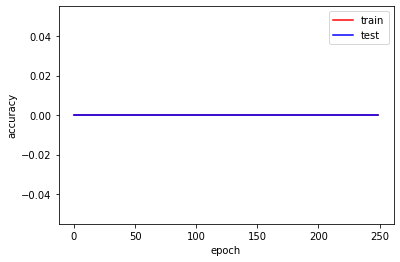

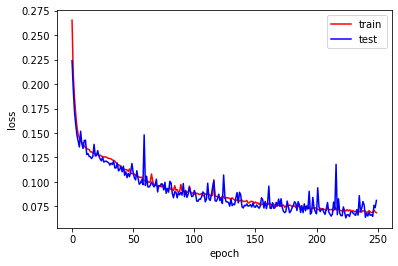

<Figure size 432x288 with 0 Axes>

In [36]:
epochsRange = range(250)

matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange, deathsModelHistory.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

##### Création d'un deuxième modèle avec plus de neurones, puis entrainement, et test 

On tente un deuxième modèle avec 6 niveaux de couches de neurones pour l'entrainement : 128, 64, 32, 16, 8, et 4. On observe que le modèle semble avoir des résultats du même ordre que le modèle précédent (cela se voit en comparant les tests manuels et en comparant les résultats du modèle affichés sur les graphiques). Mais ces résultats semblent quand même un peu meilleurs, par exemple le loss de la dernière époque d'apprentissage est souvent plus faible que celui pour le premier modèle (on le rappelle on cherche à minimer loss car il est la distance entre les résultats attendus et ceux prédits). 

<b>Pour conclure : ce deuixème modèle semble à peine plus concluant que le premier modèle.</b>

In [37]:
def createDeathsModel():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(128, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(64, activation="relu")(h)
    h = keras.layers.Dense(32, activation="relu")(h)
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(8, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [38]:
deathsModel2 = createDeathsModel2() 
deathsModel2.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-2), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

NameError: name 'createDeathsModel2' is not defined

In [ ]:
deathsModelHistory2 = deathsModel2.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 512,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

In [ ]:
deathsModelPredictions2 = deathsModel2.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame2 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame2['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions2)
print(comparisonResultAndPredictionDataFrame2.to_string())

In [ ]:
epochsRange2 = range(250)

matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange2, deathsModelHistory2.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un troisème modèle avec plus de paquets, puis entrainement, et test

On tente un troisième modèle avec la même architecture de neurones que le premier modèle, mais en faisant de plus gros paquets de 2048 lignes / observations. On peut voir que le loss final obtenu à la dernière époque est souvent supérieur aux loss des modèles précédents, cela est donc moins intéressant. On peut voir aussi que les prédictions du test manuel sont moins précises que celles des modèles précédents. 

<b>Pour conclure : ce modèle semble moins concluant que les deux modèles précédents.</b>

In [ ]:
def createDeathsModel3():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [ ]:
deathsModel3 = createDeathsModel3() 
deathsModel3.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-2), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [ ]:
deathsModelHistory3 = deathsModel3.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 2048,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

In [ ]:
deathsModelPredictions3 = deathsModel3.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame3 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame3['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions3)
print(comparisonResultAndPredictionDataFrame3.to_string())

In [ ]:
epochsRange3 = range(250)

matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange3, deathsModelHistory3.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un quatrième modèle avec un taux d'apprentissage de 5%, puis entrainement, et test

On tente un quatrième modèle avec la même architecture de neurones que le premier modèle mais avec un taux d'apprentissage de 5% (<=> 0.5 <=> 5e-1) et un nombre d'époques de 50 (suffissant pour ce qu'on veut démontrer). On peut voir que les résultats du modèle durant le test manuel sont très mauvais, le modèle semble toujours donner les mêmes résultats pour des nouvelles données. Du fait du taux d'apprentissage 5%, il y a eu du sur-apprentissage (overfitting).

<b>Pour conclure : le taux d'apprentissage a un fort impact sur le modèle, et ici un taux de 5% a produit du sur-apprentissage, le modèle est de fait très mauvais avec de nouvelles données, ce le pire modèle parmi autres faits jusqu'à présent.</b>

In [ ]:
def createDeathsModel4():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [ ]:
deathsModel4 = createDeathsModel4() 
deathsModel4.compile(optimizer = keras.optimizers.SGD(learning_rate=5e-1), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [ ]:
deathsModelHistory4 = deathsModel4.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 252,
                                       epochs = 50,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

In [ ]:
deathsModelPredictions4 = deathsModel4.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame4 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame4['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions4)
print(comparisonResultAndPredictionDataFrame4.to_string())

In [ ]:
epochsRange4 = range(50)

matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange4, deathsModelHistory4.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un cinquième modèle avec un taux d'apprentissage de 0.1%, puis entrainement, et test

On tente un cinquième modèle avec la même architecture de neurones que le premier modèle mais avec un taux d'apprentissage de 0.1% (<=> 0.001 <=> 1e-3).  On peut voir que le modèle semble plus stable, plus exact dans ces prédictions plus que le loss est plus stable, et converge d'ailleurs vers des valeurs plus faibles que les modèles précédents, cela est intéressant.

<b>Pour conclure : ce cinquième modèle est meilleur et plus concluant que les quatres modèles précédents.</b>

In [ ]:
def createDeathsModel5():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [ ]:
deathsModel5 = createDeathsModel5() 
deathsModel5.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-3), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [ ]:
deathsModelHistory5 = deathsModel5.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 252,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

In [ ]:
deathsModelPredictions5 = deathsModel5.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame5 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame5['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions5)
print(comparisonResultAndPredictionDataFrame5.to_string())

In [ ]:
epochsRange5 = range(250)

matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange5, deathsModelHistory5.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

###### Création d'un sixième modèle avec un taux d'apprentissage de 0.001%, puis entrainement, et test

On tente un cinquième modèle avec la même architecture de neurones que le premier modèle mais avec un taux d'apprentissage de 0.01% (<=> 0.0001 <=> 1e-4). Les résultats sont mitigés : le loss est plus grand que pour le cinquième modèle mais il est parfaitement stable, et prend plus de temps à converger. De plus, ce modèle est décevant avec les nouvelles données (test manuel), le modèle a sous-appris (underfitting).

<b>Pour conclure : le cinuioème modèle reste le meilleur modèle pour cette étude, celui-ci a des résultats moins concluant avec les nouvelles données, il y a eu du sous-apprentissage.</b>

In [ ]:
def createDeathsModel6():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(32, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(16, activation="relu")(h)
    h = keras.layers.Dense(4, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [ ]:
deathsModel6 = createDeathsModel6() 
deathsModel6.compile(optimizer = keras.optimizers.SGD(learning_rate=1e-4), 
                     loss = 'mean_squared_error', 
                     metrics = ['accuracy'])  

In [ ]:
deathsModelHistory6 = deathsModel6.fit(deathsModelEVTrainDataFrame, deathsModelRVTrainDataFrame,
                                       batch_size = 252,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame, deathsModelRVTestDataFrame))

In [ ]:
deathsModelPredictions6 = deathsModel6.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame))
comparisonResultAndPredictionDataFrame6 = deathsModelForPredictionRVDataFrame.copy()
comparisonResultAndPredictionDataFrame6['predicted_deaths'] = scalerResultVariable.inverse_transform(deathsModelPredictions6)
print(comparisonResultAndPredictionDataFrame6.to_string())

In [ ]:
epochsRange6 = range(250)

matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange6, deathsModelHistory6.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

#### Conception d'un modèle de prédiction du nombre de morts par classification

Toujours dans l'objectif de prédire le nombre de morts, on utilise désormais une autre méthode de fouille de données : la classification / le clustering. L'idée est que dans l'étude précédente par regression, à chaque fois pour comparer le nombre de morts attendu de celui préduit, nous étions obligé de comparer les valeurs par ordre de grandeur, car il était impossible de comparer les valeurs directement, les prédictions ne pouvant être exactes au chiffre près. Ainsi, en passant à de la classification dans cette deuxième étude, nous allons attribuer des classes de nombre de morts à chaque ligne / observation, ce qui permettra des comparaisons plus simples pour les tests. Les classes ayant un effet dès le départ de généralisation, chaque classe représente en fait un ordre de grandeur, un intervalle de valeur et pas une valeur précise. Et puis, pour des études de prédiction d'évolution d'épidémie prévoir de manière global avec des classes peut sembler plus intéressant.

###### Classification des observations par classes de nombres de morts

On détermine les valeurs extrêmes (min, max) pour le nombre de morts, on choisit des intervalles pour nos classes en fonction de ses valeurs, on attribue une classe à chaque ligne / observation. Nous faisons 10 classes : 
- classe 1 : 0 ;
- classe 2 : 1 à 100 ;
- classe 3 : 101 à 500 ;
- classe 4 : 501 à 1000 ;  
- classe 5 : 1001 à 2000 ;
- classe 6 : 2001 à 3000 ; 
- classe 7 : 3001 à 4000 ; 
- classe 8 : 4001 à 5000 ;
- classe 9 : 5001 à 6000 ;
- classe 10 : 6001 à 8000.

In [ ]:
normalizedDataFrame['deaths'].min()

In [ ]:
normalizedDataFrame['deaths'].max()

In [ ]:
normalizedDataFrame['deaths'].unique()

In [ ]:
len(normalizedDataFrame['deaths'].unique())

In [ ]:
deathsModelDataFrame2 = normalizedDataFrame.copy()
deathsModelDataFrame2

In [ ]:
deathsModelDataFrame2['class_deaths'] = [2 
                                         if deaths >= 1 and deaths <= 100 else deaths 
                                         for deaths 
                                         in deathsModelDataFrame2['deaths']]

In [ ]:
deathsModelDataFrame2['class_deaths'] = [3
                                         if deathsClass >= 101 and deathsClass <= 500
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [ ]:
deathsModelDataFrame2['class_deaths'] = [4
                                         if deathsClass >= 501 and deathsClass <= 1000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [ ]:
deathsModelDataFrame2['class_deaths'] = [5
                                         if deathsClass >= 1001 and deathsClass <= 2000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [ ]:
deathsModelDataFrame2['class_deaths'] = [6
                                         if deathsClass >= 2001 and deathsClass <= 3000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [ ]:
deathsModelDataFrame2['class_deaths'] = [7
                                         if deathsClass >= 3001 and deathsClass <= 4000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [ ]:
deathsModelDataFrame2['class_deaths'] = [8
                                         if deathsClass >= 4001 and deathsClass <= 5000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [ ]:
deathsModelDataFrame2['class_deaths'] = [9
                                         if deathsClass >= 5001 and deathsClass <= 6000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [ ]:
deathsModelDataFrame2['class_deaths'] = [10
                                         if deathsClass >= 6001 and deathsClass <= 8000
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']]

In [ ]:
deathsModelDataFrame2['class_deaths'] = [1
                                         if deathsClass == 0
                                         else deathsClass 
                                         for deathsClass 
                                         in deathsModelDataFrame2['class_deaths']] 

In [ ]:
deathsModelDataFrame2

In [ ]:
deathsModelDataFrame2['class_deaths'].unique()

In [ ]:
len(deathsModelDataFrame2['class_deaths'].unique())

In [ ]:
deathsModelDataFrame2 = deathsModelDataFrame2[['date', 'county_fips', 'state_fips', 'cases', 'class_deaths']]

In [ ]:
deathsModelDataFrame2

###### Divisions des données pour faire les ensembles necéssaires

Comme pour le modèle précédent on produit les ensembles de données que va utiliser le modèle.

In [ ]:
deathsModelForPredictionDataFrame2 = deathsModelDataFrame2.iloc[:100,]
deathsModelForPredictionDataFrame2

In [ ]:
deathsModelDataFrame2 = deathsModelDataFrame2.iloc[100:,]
deathsModelDataFrame2

In [ ]:
deathsModelForPredictionEVDataFrame2 = deathsModelForPredictionDataFrame2.iloc[:,:4]
deathsModelForPredictionEVDataFrame2

In [ ]:
deathsModelForPredictionRVDataFrame2 = deathsModelForPredictionDataFrame2.iloc[:,4:]
deathsModelForPredictionRVDataFrame2

In [ ]:
deathsModelEVDataFrame2 = deathsModelDataFrame2.iloc[:,:4]
deathsModelEVDataFrame2

In [ ]:
deathsModelRVDataFrame2 = deathsModelDataFrame2.iloc[:,4:]
deathsModelRVDataFrame2

In [ ]:
deathsModelEVTrainDataFrame2, deathsModelEVTestDataFrame2, deathsModelRVTrainDataFrame2, deathsModelRVTestDataFrame2 = train_test_split(deathsModelEVDataFrame2, deathsModelRVDataFrame2, test_size=0.25, random_state=1)

In [ ]:
deathsModelEVTrainDataFrame2

In [ ]:
deathsModelRVTrainDataFrame2

In [ ]:
deathsModelEVTestDataFrame2

In [ ]:
deathsModelRVTestDataFrame2

###### Seconde normalisation des données

Comme pour les données du modèle précédent, on effetue une seconde normalisation.

In [ ]:
scalerExplanatoryVariable2 = preprocessing.StandardScaler()
encoderResultVariable = OneHotEncoder()

In [ ]:
deathsModelEVTrainDataFrame2 = pandas.DataFrame(scalerExplanatoryVariable2.fit_transform(deathsModelEVTrainDataFrame2), 
                                                columns = deathsModelEVTrainDataFrame2.columns)
deathsModelEVTrainDataFrame2

In [ ]:
deathsModelRVTrainDataFrame2 = pandas.DataFrame(encoderResultVariable.fit_transform(deathsModelRVTrainDataFrame2.values.reshape(-1,1)).toarray())
deathsModelRVTrainDataFrame2

In [ ]:
deathsModelEVTestDataFrame2 = pandas.DataFrame(scalerExplanatoryVariable2.fit_transform(deathsModelEVTestDataFrame2), 
                                               columns = deathsModelEVTestDataFrame2.columns)
deathsModelEVTestDataFrame2

In [ ]:
deathsModelRVTestDataFrame2 = pandas.DataFrame(encoderResultVariable.fit_transform(deathsModelRVTestDataFrame2.values.reshape(-1,1)).toarray())
deathsModelRVTestDataFrame2

###### Création de l'architecture du modèle

Comme pour le modèle précédent, on déclare une fonction de création du modèle,  avec cette fois-ci en sortie 10 neurones pour les 10 classes, et softmax pour avoir une probabilité pour les 10 classes.

In [ ]:
def createDeathsModel21():
    input_layer = keras.layers.Input(shape=(4,)) # Entrée.
    h = keras.layers.Dense(128, activation="relu")(input_layer) # Entrainement.
    h = keras.layers.Dense(10, activation='softmax')(h) # Sortie.
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

###### Création et entrainement du modèle

On crée le modèle et on l'entraine avec ces paramètres : 0,1% d'apprentissage, 250 époques d'entrainement, des paquets de 252 lignes / observations.

In [ ]:
deathsModel21 = createDeathsModel21()
deathsModel21.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
deathsModelHistory21 = deathsModel21.fit(deathsModelEVTrainDataFrame2, deathsModelRVTrainDataFrame2,
                                       batch_size = 252,
                                       epochs = 250,
                                       validation_data = (deathsModelEVTestDataFrame2, deathsModelRVTestDataFrame2))

##### Test manuel de la justesse de prédiction du modèle

Comme pour le modèle précédent, on teste notre modèle par classification d'abord avec un test manuel. On touve un taux de mal-classification souvent autour de 20% - 25%, cela reste correct.

<b>Pour conclure : les résultats du test manuel sont plutôt concluant pour ce modèle.</b>

In [ ]:
deathsModelPredictions21 = deathsModel21.predict(scalerExplanatoryVariable.transform(deathsModelForPredictionEVDataFrame2))
comparisonResultAndPredictionDataFrame21 = deathsModelForPredictionRVDataFrame2.copy()
comparisonResultAndPredictionDataFrame21['predicted_class_deaths'] = encoderResultVariable.inverse_transform(deathsModelPredictions21)
print(comparisonResultAndPredictionDataFrame21.to_string())

In [ ]:
(len(comparisonResultAndPredictionDataFrame21[comparisonResultAndPredictionDataFrame21['class_deaths'] == 
                                           comparisonResultAndPredictionDataFrame21['predicted_class_deaths']]) / 
len(comparisonResultAndPredictionDataFrame21))

In [ ]:
(len(comparisonResultAndPredictionDataFrame21[comparisonResultAndPredictionDataFrame21['class_deaths'] != 
                                           comparisonResultAndPredictionDataFrame21['predicted_class_deaths']]) / 
len(comparisonResultAndPredictionDataFrame21))

###### Etude du modèle avec des graphiques

Comme pour le modèle précédent, on étudie la qualité de notre modèle avec des garphiques des résultats d'entrainement et de test du modèle. Le loss trouvé est correct, et il ne prend pas trop de temps pour converger.

<b>Pour conclure : ce modèle est assez concluant.</b>

In [ ]:
epochsRange21 = range(250)

matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["accuracy"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["val_accuracy"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('accuracy')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()

matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["loss"], 'r', label = 'train', linewidth = 1.5)
matplotlib.pyplot.plot(epochsRange21, deathsModelHistory21.history["val_loss"], 'b', label = 'test', linewidth = 1.5)
matplotlib.pyplot.ylabel('loss')
matplotlib.pyplot.xlabel('epoch')
matplotlib.pyplot.legend()
matplotlib.pyplot.show()
matplotlib.pyplot.clf()